Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

In order to work on the above problem, you need to do the following:

a) Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
b) Find and deal with outliers, anomalies, and missing data within the dataset.
c) Perform univariate, bivariate and multivariate analysis recording your observations.
d) Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
e) Challenge your solution by providing insights on how you can make improvements.

# **1. DEFINING THE QUESTION**

 a.) Specifying the question

How to predict which individuals are most likely to have or use a bank account. 

Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

b.) Defining the metric for success

The variables with the highest number of respondents having a bank account from our analysis

c.) Understanding the context

d.) Recording the experimental design

e.) Data relevance

# **2. READING THE DATA**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

data = pd.read_csv('http://bit.ly/FinancialDataset')

# **3. CHECKING/VIEWING THE DATA**

In [3]:
# Determining the no. of records in our dataset #
data.shape

(23524, 13)

In [4]:
# Previewing the top of our dataset #
data.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Checking whether each column has an appropriate datatype#
data.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

# **4. DATA CLEANING**

4.1 Checking for and dealing with missing values in the dataset

In [6]:
data.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [7]:
# dealing with missing data
data1 = data.fillna({'country':'Other',
'Has a Bank account':'Other',
'Type of Location':'Other',
'Cell Phone Access':'Other',
'household_size':0,
'Respondent Age':15,
'gender_of_respondent':'Nonbinary',
'The relathip with head':'Unknown',
'marital_status':'Engaged',
'Level of Educuation':'Other/Dont know/RTA',
'Type of Job':'Dont Know/Refuse to answer'})
data1.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# **5. UNIVARIATE ANALYSIS**


5.1 Measures of Central Tendency
- Here we find the mean, median and mode of the variables.

In [8]:
# FINDING THE MEAN. MEDIAN AND MODE OF OUR NUMERICAL VARIABLES, household size and respondent age using a function
def my_function(x1,x2):
  for x in (x1,x2):
    if x == "household_size":
      mean = str(int(data1["household_size"].mean()))
      median = str(int(data1["household_size"].median()))
      mode = str(int(data1["household_size"].mode()))
      print("Household size mean : " + mean)
      print("Household size median : " + median)
      print("Household size mode : " + mode)
    else:
        mean = str(int(data1["Respondent Age"].mean()))
        median = str(int(data1["Respondent Age"].median()))
        mode = str(int(data1["Respondent Age"].mode()))
        print("Respondent Age mean : " + mean)
        print("Respondent Age median : " + median)
        print("Respondent Age mode : " + mode)
      
my_function("household_size", "Respondent Age")


Household size mean : 3
Household size median : 3
Household size mode : 2
Respondent Age mean : 38
Respondent Age median : 35
Respondent Age mode : 30


5.2 Measures of Dispersion/Variability/Spread

In [9]:
# COMPUTING FOR VARIANCE,STD,QUANTILES,IQR, SKEWNESS AND KURTOSIS for household size and respondent age using a function

def my_function(x1,x2):
  for x in (x1,x2):
    if x == "household_size":
      var = str(int(data1["household_size"].var()))
      std = str(int(data1["household_size"].std()))
      IQR = str(int((data1["household_size"].max()) - (data1["household_size"].min())))
      quantile = str(data1["household_size"].quantile([0.25,0.5,0.75]))
      skew = str(int(data1["household_size"].skew()))
      kurt = str(int(data1["household_size"].kurt()))
      print("Household size var : " + var)
      print("Household size std : " + std)
      print("Household size IQR : " + IQR)
      print("Household size quantile : " + quantile)
      print("Household size skew : " + skew)
      print("Household size kurt : " + kurt)
    else:
      var = str(int(data1["Respondent Age"].var()))
      std = str(int(data1["Respondent Age"].std()))
      IQR = str(int((data1["Respondent Age"].max()) - (data1["household_size"].min())))
      quantile = str(data1["Respondent Age"].quantile([0.25,0.5,0.75]))
      skew = str(int(data1["Respondent Age"].skew()))
      kurt = str(int(data1["Respondent Age"].kurt()))
      print("Respondent Age var : " + var)
      print("Respondent Age std : " + std)
      print("Respondent Age IQR : " + IQR)
      print("Respondent Age quantile : " + quantile)
      print("Respondent Age skew : " + skew)
      print("Respondent Age kurt : " + kurt)
      
my_function("household_size", "Respondent Age")
# in both variables, there's positive skewness meaning the mean is greater than mode.

# household size kurtosis is > 0 meaning the distribution has heavier tails and is called a leptokurtic distribution 
# while Respondent Age kurtosis is also > 0, it's closer to 0,meaning is has closetoa normal distribution that he earlier variable.

# household size var is 5.208 

Household size var : 5
Household size std : 2
Household size IQR : 21
Household size quantile : 0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64
Household size skew : 0
Household size kurt : 1
Respondent Age var : 273
Respondent Age std : 16
Respondent Age IQR : 100
Respondent Age quantile : 0.25    26.0
0.50    35.0
0.75    49.0
Name: Respondent Age, dtype: float64
Respondent Age skew : 0
Respondent Age kurt : 0


5.3 Checking for outliers in the dataset using box plot
- Here the data distribution based on continous variables is displayed to show the minimum, first quartile, second quartile(median), third quartile and maximum and also helps in detecting outliers


C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


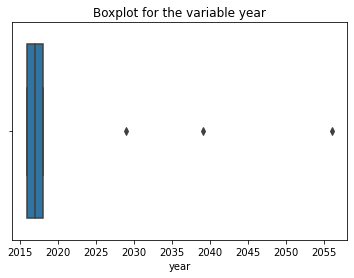

C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


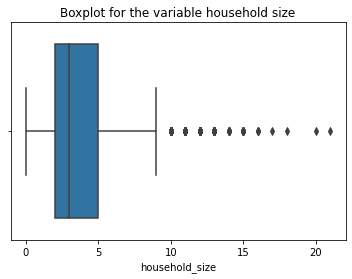

C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


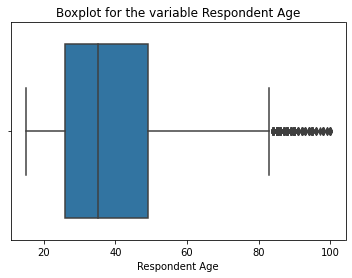

In [10]:
# Outliers for continous variables considering scales of measurement #
def outlier(y1, y2, y3):
  for y in (y1, y2, y3):
    if y == y1:
      plt.title('Boxplot for the variable year')
      sns.boxplot(data1['year'])
      plt.show()
    elif y == y2:
      plt.title('Boxplot for the variable household size')
      sns.boxplot(data1['household_size'])
      plt.show()
    else:
      plt.title('Boxplot for the variable Respondent Age')
      sns.boxplot(data1['Respondent Age'])
      plt.show()
outlier('year','household_size','Respondent Age')

In [11]:
# CREATING FREQUENCING TABLES
def frequency():
  for x in data1:
    if x == x:
      df = data1[x].value_counts()
      print(df)
frequency()

Rwanda      8735
Tanzania    6606
Kenya       6068
Uganda      2101
Other         14
Name: country, dtype: int64
2016    8734
2018    8167
2017    6620
2029       1
2056       1
2039       1
Name: year, dtype: int64
uniqueid_1       4
uniqueid_1413    4
uniqueid_1411    4
uniqueid_1410    4
uniqueid_1409    4
                ..
uniqueid_7318    1
uniqueid_7317    1
uniqueid_7316    1
uniqueid_7315    1
uniqueid_8759    1
Name: uniqueid, Length: 8735, dtype: int64
No       20179
Yes       3309
Other       36
Name: Has a Bank account, dtype: int64
Rural    14338
Urban     9171
Other       15
Name: Type of Location, dtype: int64
Yes      17449
No        6064
Other       11
Name: Cell Phone Access, dtype: int64
2.0     5132
1.0     3967
3.0     3535
4.0     3211
5.0     2727
6.0     2031
7.0     1383
8.0      741
9.0      356
10.0     192
11.0      66
12.0      66
0.0       64
13.0      25
15.0      11
14.0       9
16.0       4
21.0       1
18.0       1
17.0       1
20.0       1
Name: hous

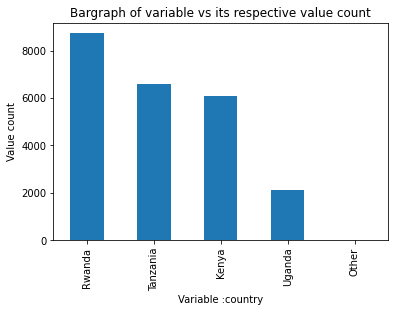

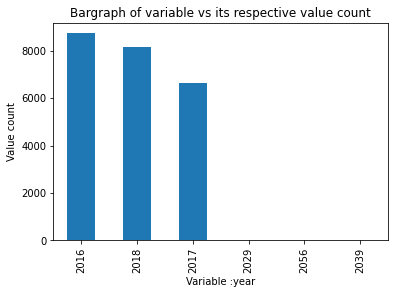

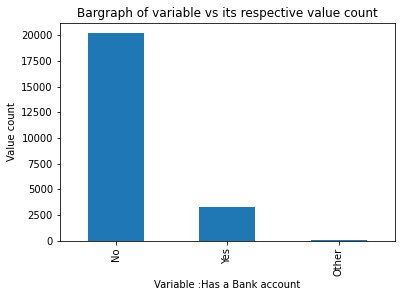

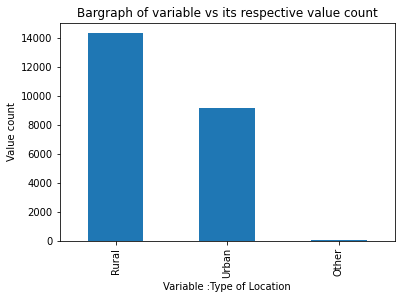

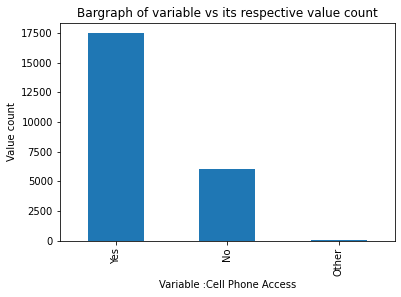

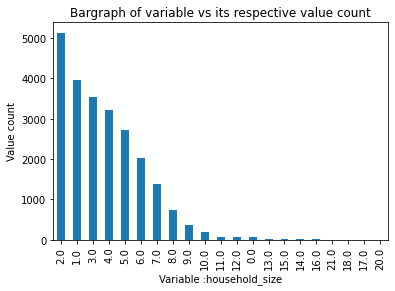

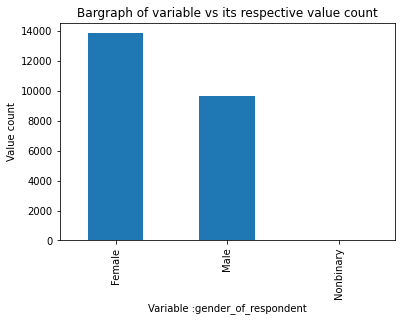

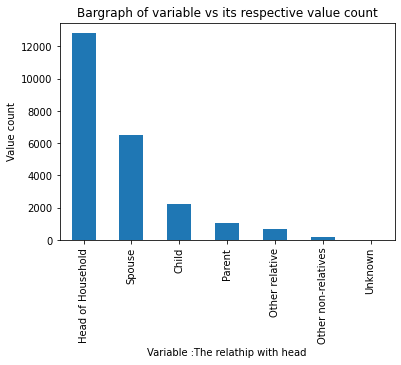

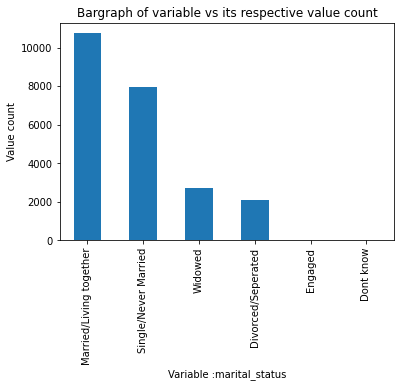

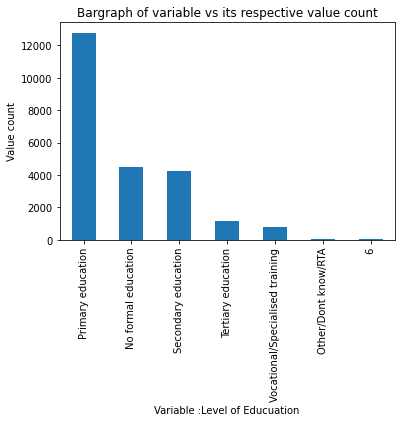

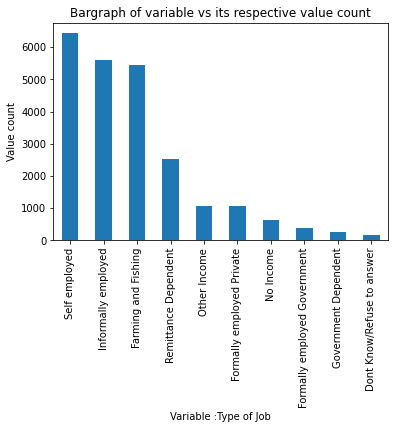

In [12]:
# plotting bar graph with respect to variables
df = data1.drop('Respondent Age', axis = 1)
df1 = df.drop('uniqueid', axis = 1)
def bar():
  for x in df1:
    if x == x:
      df1[x].value_counts().plot(kind = 'bar')
      plt.xlabel('Variable :'+ x)
      plt.ylabel('Value count')
      plt.title('Bargraph of variable vs its respective value count')
      plt.show()
bar()


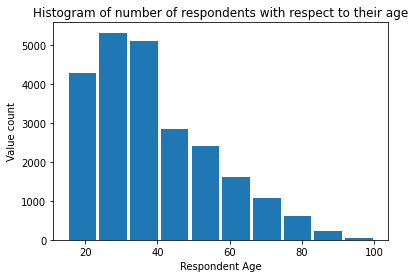

In [13]:
# plotting a histogram for Respondent age since it couldnt fit in a bar chart
plt.hist(data1['Respondent Age'], histtype='bar', rwidth=0.9)
plt.xlabel('Respondent Age')
plt.ylabel('Value count')
plt.title('Histogram of number of respondents with respect to their age')
plt.show()

# **6. BIVARIATE ANALYSIS**


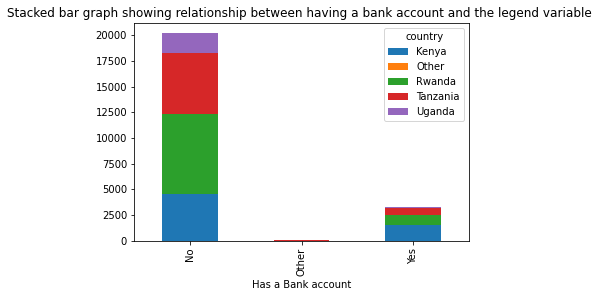

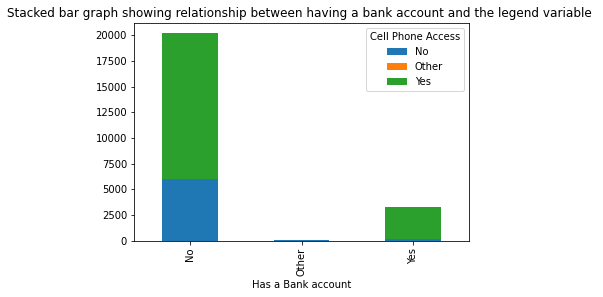

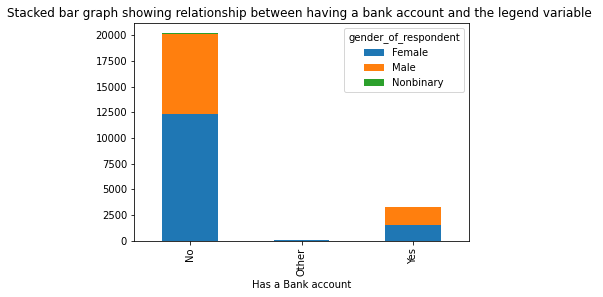

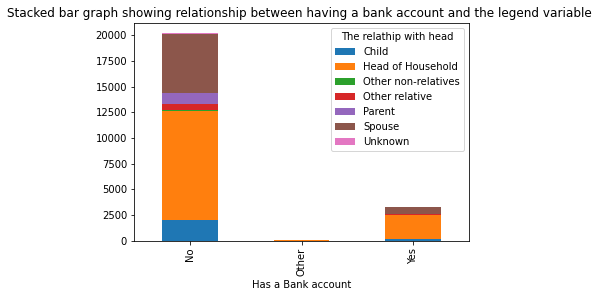

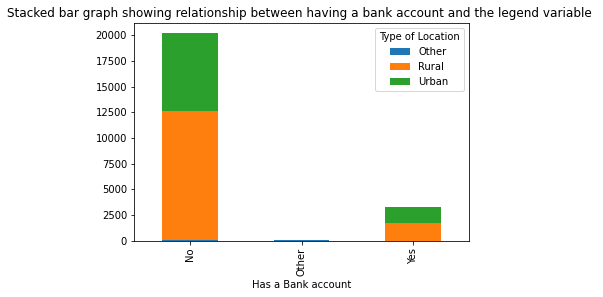

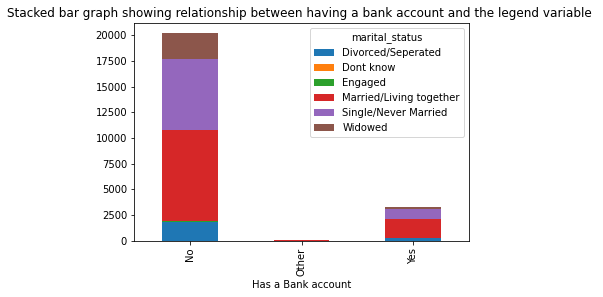

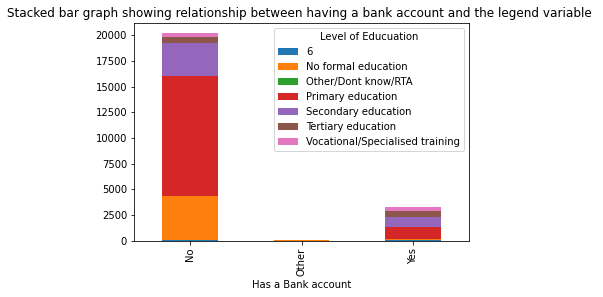

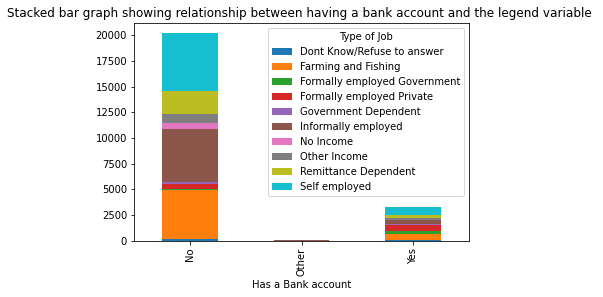

In [64]:
# to show the relationship between having a bank account and other categorical variables
def function(x,y):
    variable_bank = pd.crosstab(index = data1[x], columns = data1[y])
    variable_bank.plot(kind = 'bar',stacked = True)
    plt.title('Stacked bar graph showing relationship between having a bank account and the legend variable ')
    
function('Has a Bank account','country') 
# Kenya has the highest number of bank account ownership while Uganda has the least
function('Has a Bank account','Cell Phone Access') 
# Owning a cellphone doesn't necessarily mean the person has a bank account since there is a 
# huge number of people who own cellphones but don't have a bank account
function('Has a Bank account','gender_of_respondent') 
# More female respondents dont have bank accounts while fewer men don't have bank accounts. 
# Generally, the number of gender respondents that has no bank account is higher than with bank accounts
function('Has a Bank account','The relathip with head') 
# The head of the household and Spouse are the respondents that have a high number of bank accounts 
# although this number is lower than that of respondents without a bank account
function('Has a Bank account','Type of Location') 
# Rural location has more respondents without an account than urban areas
# Focus should be directed to these rural areas to campaign for opening of bank accounts
function('Has a Bank account','marital_status') 
# many respondents have no accounts compared to those that do with respect to marital status
# married and single respondents have the highest number of bank accounts usage compared to all other marital statuses
function('Has a Bank account','Level of Educuation') 
# primary and secondary levels of education have the highest number of respondents with bank account usage 
# while generally there are more respondents without bank accounts at these levels of education
function('Has a Bank account','Type of Job') 
# Self employed respondents have the highest number of bank accounts ownership compared to other job types
# kenya has more households than the other countries in our dataset,followed by UG


Text(0.5, 1.0, 'Bargraph showing how many households possess bank accounts')

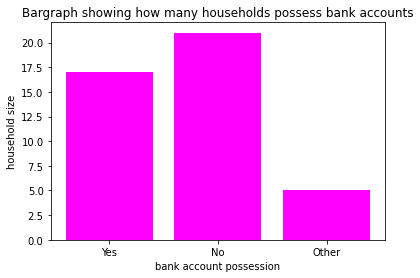

In [70]:
# to show numerical variables and their relationship to owning a bank account
def account(x,y):
    plt.bar(data1[x],data1[y], color = 'magenta')
    plt.xlabel('bank account possession')       
account('Has a Bank account','household_size')
plt.ylabel('household size')
plt.title('Bargraph showing how many households possess bank accounts')
# households with a size of approx 0-17 have the highest number of bank account possession
# while than of the size 20 has the least number of bank accounts


Text(0.5, 1.0, 'Bargraph showing age distribution over bank account ownership')

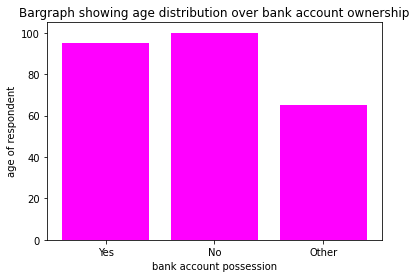

In [71]:
account('Has a Bank account','Respondent Age')
plt.ylabel('age of respondent')
plt.title('Bargraph showing age distribution over bank account ownership')


In [2]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(df)

# The overall KMO for our data is 0.84, which is excellent. 
# This value indicates that you can proceed with your planned factor analysis.

ModuleNotFoundError: No module named 'factor_analyzer'